**开始**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**获取数据** 这里已经下载了数据集

In [2]:
import os
import tarfile
import urllib.request
from pandas import DataFrame
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("housing",'housing.csv')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def load_housing_data(path=HOUSING_PATH) -> DataFrame:
    return pd.read_csv(path)

**查看数据结构信息**

In [3]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


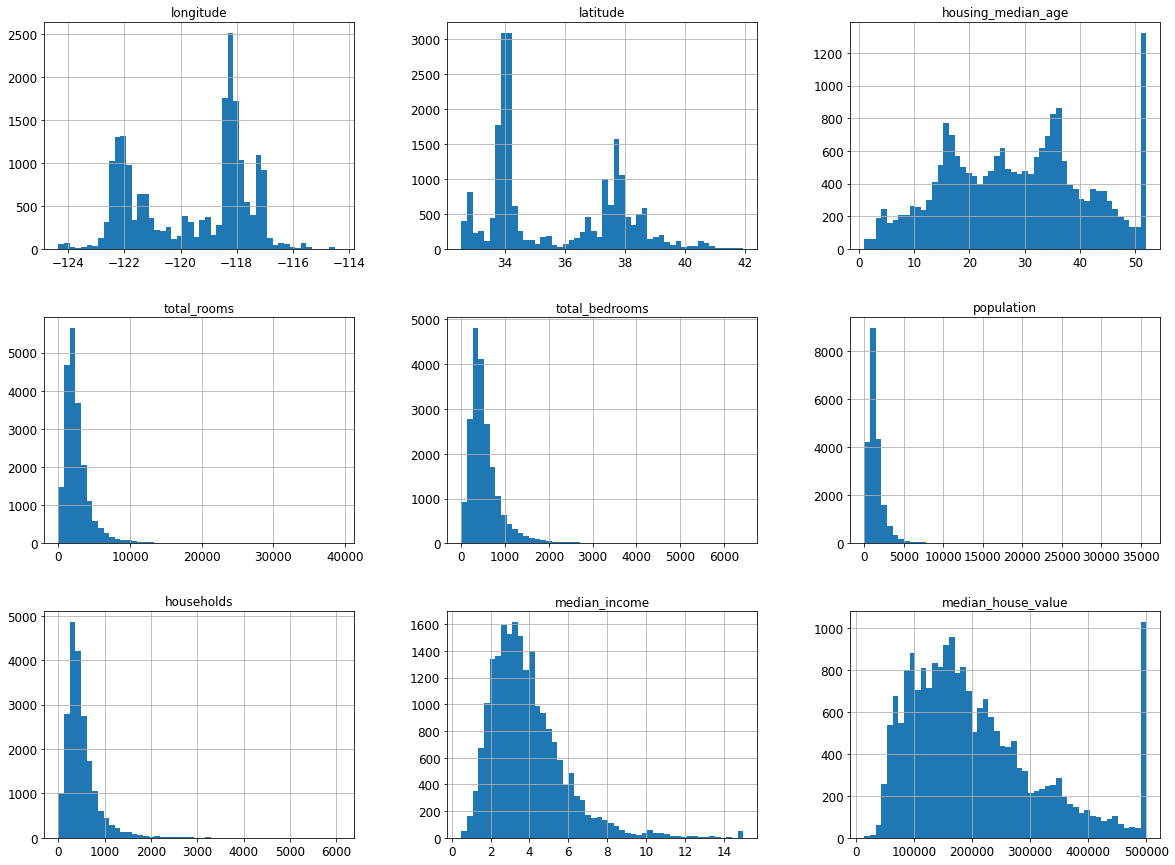

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

**创建测试集合**

In [8]:
import numpy as np
from pandas import DataFrame
from numpy import ndarray


np.random.seed(42)
def get_shuffled_indexs(data_length:int)->ndarray:
    return np.random.permutation(data_length)
get_shuffled_indexs(100)

array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0, 18, 30, 73, 33, 90,  4, 76,
       77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28,
       93,  5, 66, 65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,
        3, 17, 38,  8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68,
       61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1,
       52, 21,  2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51])

In [9]:
def split_train_test(data:DataFrame,test_ratio:float)->(DataFrame,DataFrame):
    shuffled_indices=get_shuffled_indexs(len(data))
    test_size=int(len(data)*test_ratio)
    test_indexs=shuffled_indices[:test_size]
    train_index=shuffled_indices[test_size:]
    return data.iloc[train_index],data.iloc[test_indexs]

In [29]:
train_set,test_set=split_train_test(housing,0.2)
train_set.shape
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
2503,-120.46,36.87,20.0,1287.0,310.0,954.0,269.0,1.3386,63000.0,INLAND,-120423.13
13088,-121.35,38.55,18.0,4481.0,780.0,2211.0,775.0,3.9934,123300.0,INLAND,-121311.45
12448,-114.65,33.60,28.0,1678.0,322.0,666.0,256.0,2.9653,94900.0,INLAND,-114616.40
12820,-121.48,38.61,18.0,1511.0,315.0,1062.0,304.0,2.3438,89400.0,INLAND,-121441.39
15782,-122.40,37.78,32.0,352.0,132.0,313.0,105.0,2.5742,350000.0,NEAR BAY,-122362.22


In [30]:
test_set.shape

(4128, 11)

**哈希运算计算出crc后进行分离**

In [31]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [32]:
housing_width_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_width_id,0.2,'index')
train_set.shape,test_set.shape

((16512, 12), (4128, 12))

**新建一个id数据也可以**

In [33]:
housing_width_id=housing.reset_index()
housing['id']=housing['longitude']*1000+housing['latitude']
train_set,test_set=split_train_test_by_id(housing,0.2,'id')
train_set.shape,test_set.shape

((16322, 11), (4318, 11))

In [34]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


**scikit自带的分离工具**

In [35]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((16512, 11), (4128, 11))

In [36]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,-116997.29
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,-118126.23
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,-120445.34
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,-117077.31
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,-119763.22


<AxesSubplot:>

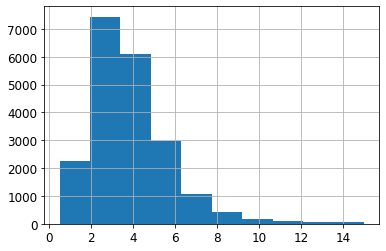

In [37]:
housing['median_income'].hist()

In [51]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

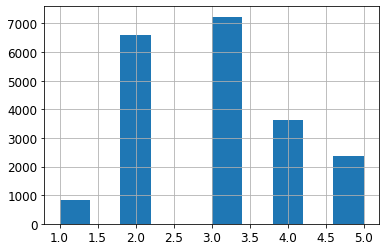

In [52]:
housing["income_cat"].hist()

**策略分组**

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_inex in split.split(housing,housing['income_cat']):
    start_train_set=housing.iloc[train_index]
    strat_test_set=housing.iloc[test_inex]
start_train_set['income_cat'].value_counts(),strat_test_set['income_cat'].value_counts()

(3    5789
 2    5265
 4    2911
 5    1890
 1     657
 Name: income_cat, dtype: int64,
 3    1447
 2    1316
 4     728
 5     472
 1     165
 Name: income_cat, dtype: int64)